In [78]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Error Probabilities ###

In the process by which we decide which of two hypotheses is better supported by our data, the final step involves a judgment about the consistency of the data and the null hypothesis. While this step results in a good decision a vast majority of the time, it can sometimes lead us astray. The reason is chance variation. For example, even when the null hypothesis is true, chance variation might cause the sample to look quite different from what the null hypothesis predicts. 

In this section, we will study how a statistical test of hypotheses might conclude that the data support the alternative hypothesis when in fact the null hypothesis is true.

Since we make our decision based on the P-value, it is time to give a more formal definition of that quantity than the mechanical method of "setting the observed statistic on the horizontal axis of the empirical histogram, and finding the area in the tail beyond."

### Definition of P-value ### 

The P-value is the chance, under the null hypothesis, that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative.

Let us first see how this definition agrees with the calculations of the previous section.

### Mendel's Pea Flowers, Revisited ###
In this example we were assessing whether or not Mendel's genetic model for a species of pea plant is good. Let's start by reviewing how we set up the decision process, and then examine the definition of the P-value in this context.

**Null Hypothesis.** Mendel's model is good: the plants are purple or white flowering like draws at random with replacement from the population *Purple, Purple, Purple, White*.

**Alternative Hypothesis.** Mendel's model is wrong.

**Test Statistic.** The distance between 0.75 and the observed proportion of purple-flowering plants:

$$ 
\mbox{test statistic} ~=~ |\mbox{observed proportion purple} - 0.75|
$$

The sample size is large (929), so if Mendel's model is good then the observed proportion of purple-flowering plants should be close to 0.75. If Mendel's model is wrong, the observed proportion purple should not be close to 0.75, resulting in a larger value of the statistic.

Thus in this situation, "in the direction of the alternative" means "larger".

The observed value of the test statistic (rounded to five decimal places) was
$$
|0.75888 - 0.75| ~=~ 0.00888
$$
and so, by definition, the P-value is the chance that a sample drawn according to Mendel's model would produce a statistic of 0.00888 or larger.

While we haven't learned how to compute that chance exactly, we can approximate it by simulation, which is what we did in the previous section. Here is all the relevant code from that section.

In [79]:
# The model and the data
model_colors = make_array('Purple', 'Purple', 'Purple', 'White')
total_plants = 929
observed_statistic = 0.0088805166846070982

In [80]:
# Simulating the test statistic under the null hypothesis
repetitions = 5000
sampled_stats = make_array()
for i in np.arange(repetitions):
    new_sample = np.random.choice(model_colors, total_plants)
    proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
    sampled_stats = np.append(sampled_stats, abs(proportion_purple - 0.75))

# The P-value (an approximation based on the simulation)
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions

Empirical P-value: 0.5436


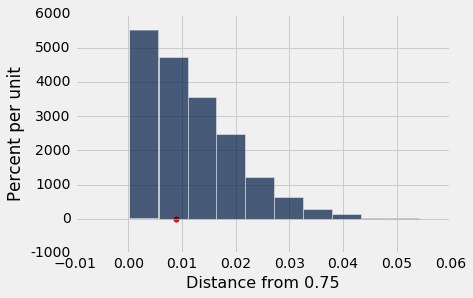

In [81]:
# Displaying the results
results = Table().with_column('Distance from 0.75', sampled_stats)
print('Empirical P-value:', empirical_P)
results.hist()
plots.scatter(observed_statistic, 0, color='red', s=30);

Notice the calculation of the P-value based on all the repetitions of drawing samples according to Mendel's model and calculating the test statistic each time:

In [82]:
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions
empirical_P

0.5436

This is the proportion of samples in which the statistic came out *equal to or larger than* the observed value of about 0.00888.

The calculation shows that if Mendel's hypothesis were true, then the chance that of getting a sample of plants that produces a test statistic as large as the one Mendel observed or even larger is about 54%. That's a substantial chance (and quite a bit greater than the conventional 5% cutoff for "small"). So Mendel's data produced a statistic that is not surprising based on his model, which supports his model more than it supports the alternative.

### The GSI's Defense, Revisited ###
In this example, Section 3 consisted of 27 students out of a class of 12 sections, and had an average midterm score that was lower than that of the other sections. We were trying to decide between the following hypotheses:

**Null Hypothesis.** The average score of Section 3 is like the average score of 27 students picked at random from the class. 

**Alternative Hypothesis.** No, it's too low.

**Test Statistic.** The average of the sampled scores.

Here, the alternative says the observed average is too low to arise out of random sampling – there's something about Section 3 that makes the average come out low. 

So here, "in the direction of the alternative" means "smaller".

The observed value of the test statistic is 13.6667, the average score of Section 3. Thus, by definition, the P-value is the chance that the average score of 27 randomly picked students is 13.6667 or smaller.

That's the chance that we approximated by simulation. Here is the code from the previous section.

In [83]:
# The data
scores = Table.read_table('scores_by_section.csv')
sec_3_mean = 13.6667
sec_3_size = 27

In [84]:
# Simulating the test statistic under the null hypothesis
repetitions = 10000
means = make_array()
for i in np.arange(repetitions):
    new_mean = scores.sample(sec_3_size, with_replacement=False).column('Midterm').mean()
    means = np.append(means, new_mean)

# The P-value (an empirical approximation based on the simulation)
empirical_P = np.count_nonzero(means <= sec_3_mean)/repetitions

Empirical P-value: 0.0569


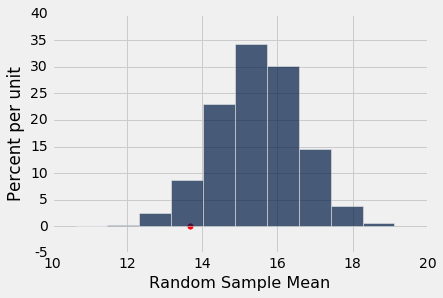

In [85]:
# Displaying the results
print('Empirical P-value:', empirical_P)
results = Table().with_column('Random Sample Mean', means)
results.hist()  
plots.scatter(sec_3_mean, 0, color='red', s=30);

The calculation of the empirical P-value is extracted in the cell below:

In [86]:
empirical_P = np.count_nonzero(means <= sec_3_mean)/repetitions
empirical_P

0.0569

This is the proportion of random samples in which the sample mean was equal to the Section 3 mean of 13.667 or even smaller. 

The simulation shows that a randomly sampled group of 27 of the students in the class have around a 6% chance of having an average score that's as low as the Section 3 average or even lower. If you follow the conventional 5% cutoff as the definition of a "small" P-value, then 6% isn't small, and the result is *not statistically significant*. In other words, you don't have enough evidence to say reject the null hypothesis of randomness. 

You are free to defy convention and choose a different cutoff. If you do so, please keep the following points in mind:
- Always provide the observed value of the test statistic and the P-value, so that the reader can make up his or her own mind about whether or not the P-value is small.
- Don't look to defy convention only when the conventionally derived result is not to your liking.
- Even if your tests conclude that Section 3's average score is lower than what would be produced by randomly sampled students, there is no information about *why* it is lower.

### The Possibility of Making a Wrong Conclusion ###
This analysis of average scores raises an important observation about the possibility of our test making the wrong conclusion.

Suppose you decided to use the 5% cutoff for the P-value. That is, suppose you would choose the alternative hypothesis if the P-value is below 5%, and otherwise stay with the null hypothesis. 

Then it is apparent from the empirical histogram of the sample means that you would have said, "It's too low," if the Section 3 mean had been 12, for example. The area to the left of 12 is less than 5%.

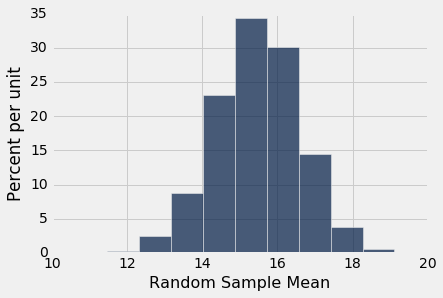

In [87]:
results.hist()  

The area to the left of 13 is also less than 5%. All the values of the sample mean for which the area to the left is less than 5% are shown in red below.

In [76]:
# HIDDEN

def draw_cutoff_left(percent, stats_array):
    xmin = plots.xlim()[0]
    xmax = plots.xlim()[1]
    cutoff = percentile(percent, stats_array)
    plots.plot([xmin, cutoff], [0,0], color='red', lw=4)
    plots.xlim(xmin, xmax);

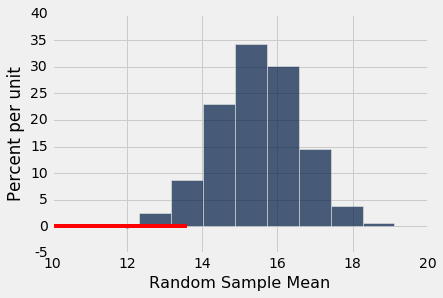

In [88]:
# HIDDEN
results.hist()
plots.scatter(12, 0)
draw_cutoff_left(5, means)

You can see that if the Section 3 mean had been close to 13, and you were using the 5% cutoff for the P-value, you would have said the section mean wasn't like the mean of a random sample.

You can also see that it's possible (though not likely) for the mean of a random sample to be around 13. In fact, several of the 5000 random samples in our simulation had means that were within 0.01 of 13.

In [89]:
results.where('Random Sample Mean', are.between(12.99, 13.01)).num_rows

13

What you are seeing is the possibility of the test making a wrong conclusion.

Had you used a 10% cutoff instead of 5%, here in red are the section means that you would have concluded were too low to come from a random sample, *even if they had come from a random sample without your knowledge*.

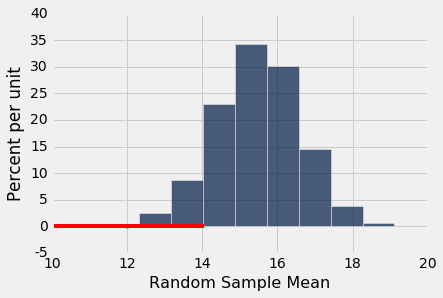

In [90]:
# HIDDEN
results.hist()
plots.scatter(12, 0)
draw_cutoff_left(10, means)

### The Chance of Making a Wrong Conclusion ###
Suppose you want to test whether a coin is fair or not. Then the hypotheses are:

**Null Hypothesis.** The coin is fair. That is, the results are like draws made at random with replacement from *Heads, Tails*.

**Alternative Hypothesis.** The coin is not fair.

Suppose your data will be based on 400 tosses of the coin. You would expect a fair coin to land heads 200 times out of 400, so a reasonable test statistic to use is
$$
\mbox{test statistic} ~=~ |\mbox{number of heads} - 200|
$$

We can simulate the statistic under the null hypothesis of fairness.

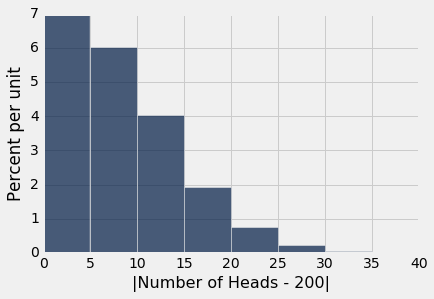

In [91]:
coin = make_array('Heads', 'Tails')
num_tosses = 400

repetitions = 10000
heads = make_array()
for i in np.arange(repetitions):
    tosses = np.random.choice(coin, 400)
    heads = np.append(heads, np.count_nonzero(tosses == 'Heads'))

sampled_stats = abs(heads - 200)
results = Table().with_column('|Number of Heads - 200|', sampled_stats)
results.hist(bins = np.arange(0, 45, 5))

If the coin is unfair, you expect the number of heads to be off 200, or in other words you expect the test statistic to be larger than it would be if the coin were fair.

So, as in the example about Mendel's pea flowers, the P-value is the area in the *right-hand tail* of the empirical distribution of the statistic.

Suppose you decide to use a 3.5% cutoff for the P-values. Then you will conclude "unfair" for the top 3.5% of 10,000 test statistics in the simulation, *even if the coin happened to be fair without your knowledge*.

In other words, if you use a 3.5% cutoff for the P-value and the coin happens to be fair, there is about a 3.5% chance that you will make the wrong conclusion that the coin is unfair.

### The Cutoff for the P-value is an Error Probability ###
The example above is a special case of a general fact:

**If you use a $p$% cutoff for the P-value, and the null hypothesis happens to be true, then there is about a $p$% chance that your test will conclude that the alternative is true.**

The 1% cutoff is therefore more conservative than 5% – there is less chance of concluding "alternative" if the null happens to be true. For this reason, randomized controlled trials of medical treatments usually use 1% as the cutoff for deciding between the following two hypotheses:

**Null Hypothesis.** The treatment has no effect; observed differences between the outcomes of the treatment and control groups of patients are due to randomization.

**Alternative Hypothesis.** The treatment has an effect.

The idea is to control the chance of concluding the treatment does something if in fact it does nothing. This reduces the risk of giving patients a useless treatment.

Still, even if you set the cutoff to be as low as 1%, and the treatment does nothing, there is about a 1% chance of concluding that the treatment does something. This is due to chance variation. There is a small chance that data from random samples end up leading you astray.

### Data Snooping ###
The discussion above implies that if we run 500 separate randomized controlled experiments about the effect of a treatment that in fact has no effect, and each experiment uses a 1% cutoff, then by chance variation, about 5 of the 500 experiments will conclude that the treatment does have an effect. 

We can hope that nobody is going to run 500 experiments on a treatment that does nothing. But it is not uncommon for researchers to test multiple hypotheses using the same data. For example, in a randomized controlled trial about the effect of a drug, researchers might test whether the drug has an effect on various different diseases. 

Now suppose the drug has no effect on anything. Just by chance variation, a small percent of the tests might conclude that it does have an effect. So, when you read a study that uses tests of hypotheses and concludes that a treatment has an effect, always ask how many different effects were tested before the researchers found the one that was reported.

If the researchers ran multiple different tests before finding one that gave a "highly statistically significant" result, use the result with caution. The study could be marred by *data snooping*, which essentially means torturing the data into making a false confession.

In such a situation, one way to validate the reported result is by replicating the experiment and testing for that particular effect alone. If it comes out significant again, that will validate the original conclusion.

### Technical Note: The Other Kind of Error ###
There is, of course, another kind of error: concluding that the treatment does nothing, when in fact it does something. Approximating that error is outside the scope of this section. Just be aware that if you set up your test to reduce one of the two errors, you almost always increase the other one.

### Technical Note: Identifying the Rejection Region ###

In the coin tossing example above, we were testing the fairness of a coin based on 400 tosses, using the 3.5% cutoff for the P-value. The test statistic was
$$
|\mbox{number of heads} - 200|
$$
We simulated this statistic under the null hypothesis of fairness.

The top 3.5% of all the statistics, which are the values for which the test will conclude that the coin is unfair, are shown in red below.

In [44]:
# HIDDEN
def draw_cutoff_right(percent, stats_array):
    xmin = plots.xlim()[0]
    xmax = plots.xlim()[1]
    cutoff = percentile(100-percent, stats_array)
    plots.plot([cutoff, xmax], [0,0], color='red', lw=4)
    plots.xlim(xmin, xmax);

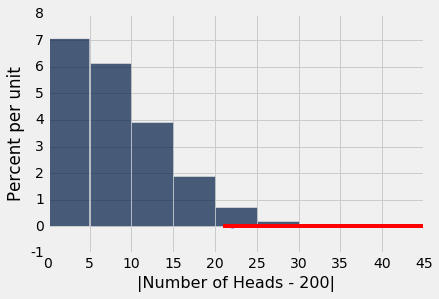

In [73]:
# HIDDEN
results.hist(bins = np.arange(0, 45, 5))
plots.scatter(22,0)
draw_cutoff_right(3.5, sampled_stats)
plots.xlim(0, 45);

You can see from the figure that under the null hypothesis of fairness, approximately the top 3.5% of test statistics have values above 20. You can also confirm this by finding the proportion of such values: 

In [74]:
results.where('|Number of Heads - 200|', are.above_or_equal_to(21)).num_rows/results.num_rows

0.0372

That is, with a 3.5% cutoff, you will conclude that the coin is unfair if the test statistic is 21 or greater.

That is, you will reject the null hypothesis if the test statistic is 21 or greater. The range "21 or greater" is therefore called the *rejection region* of this test. It corresponds to the number of heads being 221 or more, or 179 or fewer.

How would you find these values if you didn't have them marked in red on the histogram? The `percentile` function comes in handy here. It takes the percentile rank that you are trying to find, and an array containing the data. The "top 3.5%" of the statistics correspond to the 96.5th percentile of the statistics:

In [75]:
percentile(96.5, results.column(0))

21.0

**Note.** Because of "ties" (that is, several equal values in the data) and arbitrary lengths of data arrays, percentiles don't always come out neatly. Later in the course we will give a precise definition of percentiles that covers all cases. For now, just think of the `percentile` function as returning an answer that is close to what you intuitively think of as a percentile.